# Assignment: Ionosphere Data Problem

### Dataset Description: 

This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

### Attribute Information:

- All 34 are continuous
- The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task.

 <br><br>

<table border="1"  cellpadding="6">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">351</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Integer,Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">34</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">N/A</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Classification</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">N/A</p></td>
	</tr>
    </tbody>
    </table>

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature ) or any usless column.
- Shuffle the data if needed.
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 60 and 40 ratio.
- Encode labels.
- Model : 1 hidden layers including 16 unit.
- Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)
- Train the Model with Epochs (100).
- If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
- Prediction should be > **92%**
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/ionosphere_data.csv)

In [426]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1,l2,l1_l2
from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
import matplotlib.pyplot as plt
#from sklearn.metrics import average_precision_score,confusion_matrix
from sklearn.utils import shuffle

In [427]:
df = pd.read_csv('./ML_Datasets-main/ionosphere_data.csv')
df

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [428]:
df.isnull().sum()

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

In [429]:
df.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,...,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,...,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,...,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,...,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,...,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


g    225
b    126
Name: label, dtype: int64


C:\Program Files\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


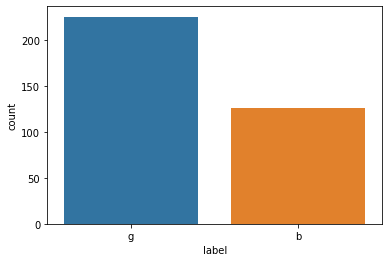

In [430]:
print(df['label'].value_counts())
sns.countplot(df['label'])

In [431]:
df.loc[(df['feature1']==1) & (df['label']=='b')]

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
5,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,b
9,1,0,-0.01864,-0.08459,0.00000,0.00000,0.00000,0.00000,0.11470,-0.26810,...,-0.01326,0.20645,-0.02294,0.00000,0.00000,0.16595,0.24086,-0.08208,0.38065,b
11,1,0,1.00000,-0.54210,1.00000,-1.00000,1.00000,-1.00000,1.00000,0.36217,...,-0.40888,1.00000,-0.62745,1.00000,-1.00000,1.00000,-1.00000,1.00000,-1.00000,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,1,0,0.42708,-0.50000,0.00000,0.00000,0.00000,0.00000,0.46458,0.51042,...,-0.40833,-1.00000,-1.00000,-0.27917,-0.75625,0.00000,0.00000,0.00000,0.00000,b
244,1,0,0.00000,0.00000,1.00000,0.12889,0.88444,-0.02000,0.00000,0.00000,...,0.00000,1.00000,-1.00000,0.00000,0.00000,1.00000,0.11778,0.90667,-0.09556,b
246,1,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,b
250,1,0,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,-1.00000,-1.00000,...,0.00000,1.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,b


In [432]:
df['feature7'].value_counts()

 1.00000    71
 0.00000    37
-1.00000    13
 0.50000     2
 0.33333     2
            ..
 0.39583     1
 0.58167     1
 0.94705     1
 0.62316     1
 0.57377     1
Name: feature7, Length: 231, dtype: int64

# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SMOTE(sampling_strategy='minority', random_state=17)

# Fit the model to generate the data.
df, y = sm.fit_resample(df.drop('label', axis=1), df['label'])
df = pd.concat([pd.DataFrame(y), pd.DataFrame(df)], axis=1)

g    225
b    126
Name: label, dtype: int64


C:\Program Files\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


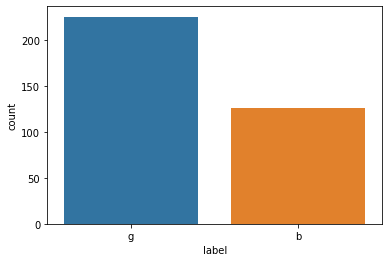

In [433]:
print(df['label'].value_counts())
sns.countplot(df['label'])

In [434]:
df.drop(labels=['feature1','feature2'],axis=1,inplace=True)

In [435]:
#df = shuffle(df,random_state=120)

In [436]:
labels = df['label']

In [437]:
encoder=LabelEncoder()
labels_enc =encoder.fit_transform(labels)
labels_enc =to_categorical(labels_enc,num_classes=2)

In [438]:
x_train,x_test,y_train,y_test=train_test_split(df,labels_enc,test_size=0.4,random_state=150)

In [439]:
x_train = x_train.drop(labels='label',axis=1)
x_test = x_test.drop(labels='label',axis=1)

In [440]:
scaler = StandardScaler()
x_train[x_train.columns] = scaler.fit_transform(x_train)
x_test[x_test.columns] = scaler.transform(x_test)

In [441]:
x_train.shape

(210, 32)

In [442]:
model = Sequential()
model.add(Dense(26,activation='relu',input_shape=(x_train.shape[1],),kernel_regularizer=l2(1e-6)))
model.add(Dropout(0.2))
model.add(Dense(14,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2,activation='sigmoid'))

In [443]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['acc'])

In [444]:
history = model.fit(x_train,y_train,epochs=80,validation_split=0.2)

Train on 168 samples, validate on 42 samples
Epoch 1/80
168/168 [==============================] - 1s 6ms/sample - loss: 0.6912 - acc: 0.5476 - val_loss: 0.6796 - val_acc: 0.6190
Epoch 2/80
168/168 [==============================] - 0s 173us/sample - loss: 0.6849 - acc: 0.5982 - val_loss: 0.6775 - val_acc: 0.6310
Epoch 3/80
168/168 [==============================] - 0s 173us/sample - loss: 0.6819 - acc: 0.6161 - val_loss: 0.6752 - val_acc: 0.6667
Epoch 4/80
168/168 [==============================] - 0s 155us/sample - loss: 0.6827 - acc: 0.5685 - val_loss: 0.6727 - val_acc: 0.6548
Epoch 5/80
168/168 [==============================] - 0s 161us/sample - loss: 0.6791 - acc: 0.6399 - val_loss: 0.6694 - val_acc: 0.6905
Epoch 6/80
168/168 [==============================] - 0s 155us/sample - loss: 0.6762 - acc: 0.6577 - val_loss: 0.6662 - val_acc: 0.7143
Epoch 7/80
168/168 [==============================] - 0s 166us/sample - loss: 0.6658 - acc: 0.6786 - val_loss: 0.6625 - val_acc: 0.7262
Epoch

Epoch 59/80
168/168 [==============================] - 0s 161us/sample - loss: 0.2566 - acc: 0.8661 - val_loss: 0.2754 - val_acc: 0.8810
Epoch 60/80
168/168 [==============================] - 0s 167us/sample - loss: 0.3161 - acc: 0.8571 - val_loss: 0.2726 - val_acc: 0.8810
Epoch 61/80
168/168 [==============================] - 0s 162us/sample - loss: 0.2703 - acc: 0.8780 - val_loss: 0.2665 - val_acc: 0.8929
Epoch 62/80
168/168 [==============================] - 0s 161us/sample - loss: 0.3233 - acc: 0.8214 - val_loss: 0.2650 - val_acc: 0.8929
Epoch 63/80
168/168 [==============================] - 0s 143us/sample - loss: 0.3270 - acc: 0.8363 - val_loss: 0.2705 - val_acc: 0.8810
Epoch 64/80
168/168 [==============================] - 0s 161us/sample - loss: 0.2521 - acc: 0.8869 - val_loss: 0.2755 - val_acc: 0.8810
Epoch 65/80
168/168 [==============================] - 0s 161us/sample - loss: 0.2449 - acc: 0.8899 - val_loss: 0.2843 - val_acc: 0.8810
Epoch 66/80
168/168 [====================

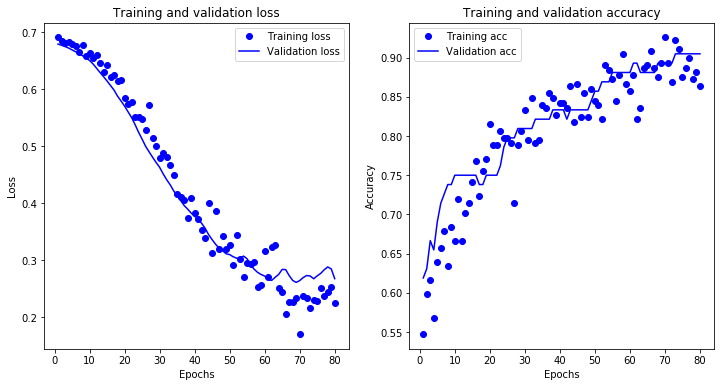

In [445]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = np.arange(1, len(history_dict["acc"]) + 1)
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(122)
plt.plot(epochs, history_dict["acc"], 'bo', label='Training acc')
plt.plot(epochs, history_dict["val_acc"], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [446]:
test_results = model.evaluate(x_test, y_test)
print("The model test accuracy is {}.".format(test_results[1]))

141/141 [==============================] - 0s 92us/sample - loss: 0.1976 - acc: 0.9220
The model test accuracy is 0.9219858050346375.


In [447]:
predictions=model.predict_classes(x_test)
predictions

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1], dtype=int64)